# BIC TCP Simulation Analyzes

### importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Reading Data

In [2]:
df1 = pd.read_csv('bic_tcp_parameters.csv')

df2 = pd.read_csv('log.log', delimiter='--', engine='python', names=['round', 'message'])
df2['round'] = df2['round'].astype(int)
df2['message'] = df2['message'].astype(str).apply(str.strip)

In [3]:
df1.head()

,round,cwnd,wmax,wmin
0,1.0,15.0,30.0,17.50000
1,2.0,20.0,30.0,23.75000
2,3.0,25.0,30.0,26.87500
3,4.0,25.0,30.0,28.43750
4,5.0,25.0,30.0,29.21875


In [4]:
df2.head()

,round,message
0,1,Binary Search Increase
1,1,midpoint = 17.5
2,1,wmin = 17.5
3,1,wmax(30) - cwnd(10) > smax(5)
4,1,Additive Increase


#### NOTE:
- df1 contains tcp values at the end of each round(RTT).
- df2 contains BIC TCP logs in 50 round(RTT).

### Get Certain Rounds Info
simply just change the n and see the results.

#### - Bic TCP parameters data at the end of round n

In [5]:
n = 1

In [6]:
df1.loc[df1['round']== n]

,round,cwnd,wmax,wmin
0,1.0,15.0,30.0,17.5


#### - Bic TCP logs at round n

In [7]:
df2.loc[df2['round']== n]

,round,message
0,1,Binary Search Increase
1,1,midpoint = 17.5
2,1,wmin = 17.5
3,1,wmax(30) - cwnd(10) > smax(5)
4,1,Additive Increase
5,1,wmax(30) - cwnd(10) > smax(5)
6,1,cwnd = 15


### Descriptive Statistics of the first dataframe.
without considering round column

In [8]:
df1.iloc[:, 1:].describe()

,cwnd,wmax,wmin
count,50.000000,50.0,50.000000
mean,28.848437,30.0,28.812500
std,2.636330,0.0,1.835522
min,15.000000,30.0,17.500000
25%,29.609375,30.0,29.218750
50%,29.609375,30.0,29.218750
75%,29.609375,30.0,29.218750
max,29.609375,30.0,29.218750


### Plotting BIC TCP parameters over time.

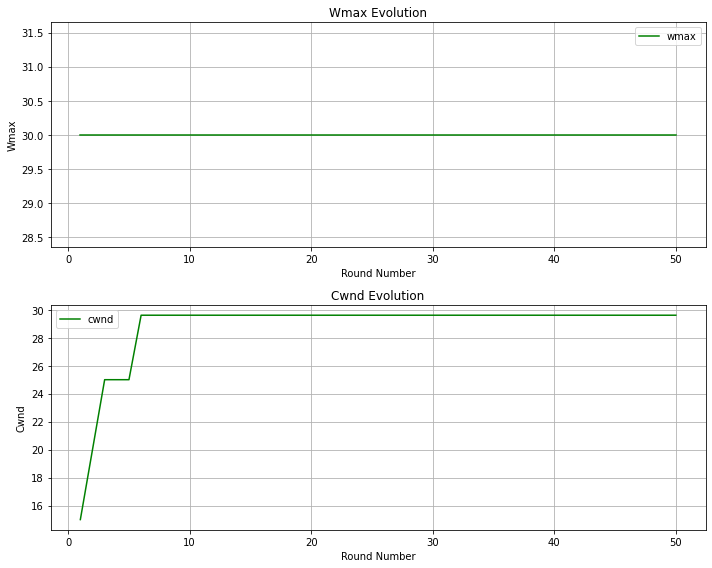

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot wmax against roundnumber
axs[0].plot(df1['round'], df1['wmax'], label='wmax', color='green')
axs[0].set_xlabel('Round Number')
axs[0].set_ylabel('Wmax')
axs[0].set_title('Wmax Evolution')
axs[0].grid(True)
axs[0].legend()

# Plot cwnd against roundnumber
axs[1].plot(df1['round'], df1['cwnd'], label='cwnd', color='green')
axs[1].set_xlabel('Round Number')
axs[1].set_ylabel('Cwnd')
axs[1].set_title('Cwnd Evolution')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()